# Get distance matrices

We need to get different distance matrices (alpha, beta, and combined).

In [1]:
from google.colab import drive

drive.mount('/content/drive')
%ls

Mounted at /content/drive
drive/  sample_data/


In [2]:
%cd drive/MyDrive/dsmp-2024-groupol1/

/content/drive/MyDrive/dsmp-2024-groupol1


In [3]:
import pandas as pd
df = pd.read_csv('./data/vdjdb.txt', sep="\t")

In [4]:
# Select the columns we need
selected_features = df[['gene','cdr3','v.segm','j.segm','species','mhc.a','mhc.b','mhc.class','antigen.epitope','antigen.species','vdjdb.score']]

In [5]:
# Select all human data
human_data = selected_features[(selected_features['species'] == 'HomoSapiens') & (selected_features['vdjdb.score'] > 0)]

# Drop duplicate rows
human_data = human_data.drop_duplicates()

# Delete rows with null values
human_data  = human_data.dropna()
# Print all data
human_data.head()

,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score
0,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
2,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
3,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
4,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2


# Distance matrix for beta chains

In [6]:
# get beta chains only
TRB = human_data[human_data['gene'] =='TRB']
# rename the columns for our beta chain matrix calculation
beta_chains = TRB[['cdr3', 'v.segm', 'j.segm', 'antigen.epitope']]
beta_chains.rename(columns={'cdr3':'cdr3_b_aa','v.segm':'v_b_gene', 'j.segm':'j_b_gene'}, inplace=True)
beta_chains

<ipython-input-6-52f813f5eadc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_chains.rename(columns={'cdr3':'cdr3_b_aa','v.segm':'v_b_gene', 'j.segm':'j_b_gene'}, inplace=True)


,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope
1,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
2,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
4,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
6,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
8,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,FLKEKGGL
...,...,...,...,...
92682,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01,PQPELPYPQPQL
92684,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01,FPQPEQPFPWQP
92686,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,FPQPEQPFPWQP
92690,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,QLQPFPQPELPY


In [7]:
!pip install tcrdist3
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.4/366.4 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 478.0/478.0 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tcrdist3: filename=tcrdist3-0.2.2-py3-none-any.whl size=2100321 sha256=5d0b004ac21b09e9562f4d7c2b355aa0ba7e79d9ce0ebf662bcb317815a642de
  Stored in directory: /root/.cache/pip/wheels/da/a2/13/eea7ee0b95b1f391f5559e8bc15459e27beb2abdc59d4fce0e
  Created wheel for feather-format: filena

In [9]:
import os
from tcrdist.repertoire import TCRrep
import umap
import umap.plot
import matplotlib.pyplot as plt

def calculate_dist_and_umap(df, chain, gene):
  tr = TCRrep(cell_df = df,
            organism = 'human',
            chains = [chain],
            db_file = 'alphabeta_gammadelta_db.tsv')

  if chain == 'beta':
    distance_matrix = pd.concat([pd.DataFrame(tr.pw_cdr3_b_aa), tr.clone_df[gene]], axis = 1)
  else:
    distance_matrix = pd.concat([pd.DataFrame(tr.pw_cdr3_a_aa), tr.clone_df[gene]], axis = 1)

  value_counts_antigen = distance_matrix[gene].value_counts()
  top_10_value_counts = value_counts_antigen.nlargest(7)
  distance_matrix_filtered = distance_matrix[distance_matrix[gene].isin(top_10_value_counts.index)]

  distances_reduced = umap.UMAP(n_components = 2, n_neighbors = 100).fit(distance_matrix_filtered.iloc[:, :-1].values)

  output_dir = 'visualisations'

  f = umap.plot.points(distances_reduced, labels=distance_matrix_filtered[gene])
  f.set_xlabel('UMAP Dimension 1', fontsize=10)
  f.set_ylabel('UMAP Dimension 2', fontsize=10)
  f.set_title(f'UMAP Visualization of {chain}', fontsize=12)

  # Save the figure
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  f.get_figure().savefig(f'{output_dir}/{chain}_chain_umap.png')
  return distance_matrix


In [10]:
beta_chains['v_b_gene'].unique()

array(['TRBV13*01', 'TRBV14*01', 'TRBV7-2*01', 'TRBV3-1*01', 'TRBV4-1*01',
       'TRBV4-2*01', 'TRBV16*01', 'TRBV5-1*01', 'TRBV28*01',
       'TRBV12-3*01', 'TRBV9*01', 'TRBV5-5*01', 'TRBV11-2*01',
       'TRBV10-1*01', 'TRBV7-7*01', 'TRBV20-1*01', 'TRBV27*01',
       'TRBV18*01', 'TRBV11-3*01', 'TRBV2*01', 'TRBV6-2*01', 'TRBV7-8*01',
       'TRBV15*01', 'TRBV11-1*01', 'TRBV30*01', 'TRBV6-5*01',
       'TRBV5-6*01', 'TRBV4-3*01', 'TRBV7-6*01', 'TRBV7-9*01',
       'TRBV19*01', 'TRBV12-4*01', 'TRBV6-6*01', 'TRBV10-3*01',
       'TRBV7-3*01', 'TRBV6-1*01', 'TRBV29-1*01', 'TRBV24-1*01',
       'TRBV6-4*01', 'TRBV5-8*01', 'TRBV5-4*01', 'TRBV25-1*01',
       'TRBV10-2*01', 'TRBV6-3*01', 'TRBV12-5*01', 'TRBV6-6*02',
       'TRBV6-9*01', 'TRBV7-9*03', 'TRBV10-3*02', 'TRBV9*02',
       'TRBV7-2*02', 'TRBV19*02', 'TRBV6-4*02', 'TRBV7-4*01',
       'TRBV7-2*03'], dtype=object)

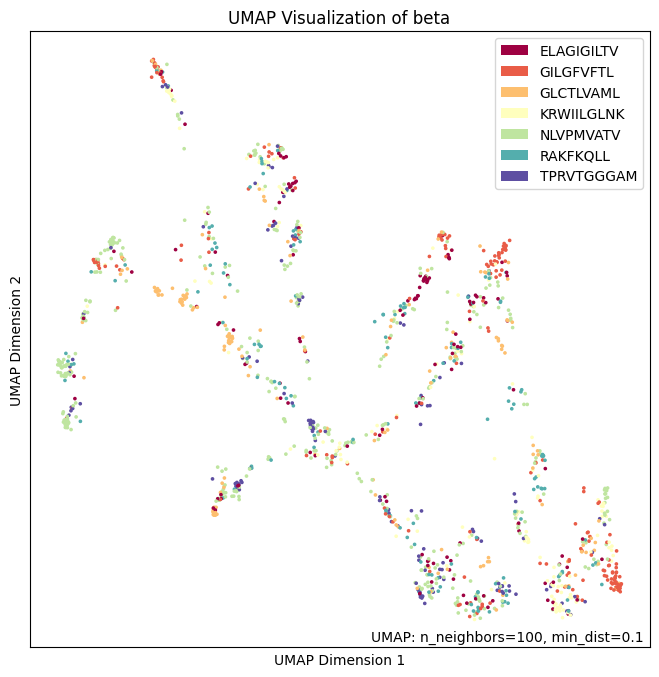

In [13]:
beta_dist_matrix = calculate_dist_and_umap(beta_chains, 'beta', 'antigen.epitope')

# Distance matrix for alpha chains

Index(['cdr3_a_aa', 'v_a_gene', 'j_a_gene', 'antigen.epitope'], dtype='object')


/usr/local/lib/python3.10/dist-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/usr/local/lib/python3.10/dist-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


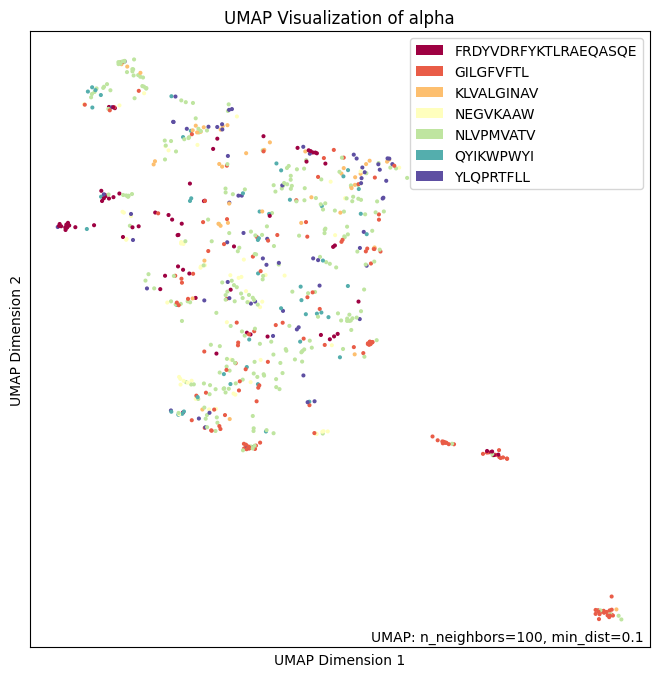

In [14]:
# Do the same as above but for alpha chains

TRA = human_data[human_data['gene'] =='TRA']
alpha_chains = TRA[['cdr3', 'v.segm', 'j.segm', 'antigen.epitope']].copy()
alpha_chains.rename(columns={'cdr3':'cdr3_a_aa','v.segm':'v_a_gene', 'j.segm':'j_a_gene'}, inplace=True)
print(alpha_chains.columns)

alpha_df = calculate_dist_and_umap(alpha_chains, 'alpha', 'antigen.epitope')

In [15]:
alpha_df

,0,1,2,3,4,5,6,7,8,9,...,1819,1820,1821,1822,1823,1824,1825,1826,1827,antigen.epitope
0,0,30,30,24,3,32,55,36,48,34,...,27,27,31,31,31,32,33,28,36,EPLPQGQLTAY
1,30,0,0,23,30,28,40,32,45,24,...,32,32,24,32,32,36,31,32,35,NNSYECDIPIGAGIC
2,30,0,0,23,30,28,40,32,45,24,...,32,32,24,32,32,36,31,32,35,VGGNYNYLYRLFRKS
3,24,23,23,0,24,24,44,24,45,22,...,24,24,22,23,23,27,25,30,31,GADGVGKSAL
4,3,30,30,24,0,31,54,36,51,34,...,24,24,30,31,31,31,33,31,36,EPLPQGQLTAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,31,32,32,23,31,20,48,15,38,18,...,20,20,20,0,0,24,24,26,27,GTSGSPIVNR
1824,32,36,36,27,31,16,51,28,48,27,...,27,27,27,24,24,0,32,25,32,LLEFYLAMPFATP
1825,33,31,31,25,33,24,52,20,50,24,...,28,28,28,24,24,32,0,32,19,YLQPRTFLL
1826,28,32,32,30,31,25,50,30,44,30,...,25,25,26,26,26,25,32,0,35,QYIKWPWYI


In [16]:
AA_TRIPLET_TO_SINGLE = {
    "ARG": "R",
    "HIS": "H",
    "LYS": "K",
    "ASP": "D",
    "GLU": "E",
    "SER": "S",
    "THR": "T",
    "ASN": "N",
    "GLN": "Q",
    "CYS": "C",
    "SEC": "U",
    "GLY": "G",
    "PRO": "P",
    "ALA": "A",
    "VAL": "V",
    "ILE": "I",
    "LEU": "L",
    "MET": "M",
    "PHE": "F",
    "TYR": "Y",
    "TRP": "W",
}
AA_SINGLE_TO_TRIPLET = {v: k for k, v in AA_TRIPLET_TO_SINGLE.items()}

# 21 amino acids
AMINO_ACIDS = "RHKDESTNQCUGPAVILMFYW"
assert len(AMINO_ACIDS) == 21
assert all([x == y for x, y in zip(AMINO_ACIDS, AA_TRIPLET_TO_SINGLE.values())])
AMINO_ACIDS_TO_IDX = {aa: i for i, aa in enumerate(AMINO_ACIDS)}

# Pad with $ character
PAD = "$"
MASK = "."
UNK = "?"
SEP = "|"
CLS = "*"
AMINO_ACIDS_WITH_ALL_ADDITIONAL = AMINO_ACIDS + PAD + MASK + UNK + SEP + CLS
AMINO_ACIDS_WITH_ALL_ADDITIONAL_TO_IDX = {
    aa: i for i, aa in enumerate(AMINO_ACIDS_WITH_ALL_ADDITIONAL)
}



In [19]:
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [20]:
from transformers import BertModel, BertTokenizer

model_name = 'wukevin/tcr-bert'

model = BertModel.from_pretrained(model_name, add_pooling_layer=False).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.64k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/230M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [21]:
from typing import Iterable, Sequence, Any
from math import floor


def is_whitespaced(seq: str) -> bool:
    tok = list(seq)
    spaces = [t for t in tok if t.isspace()]
    if len(spaces) == floor(len(seq) / 2):
        return True
    return False

def get_pretrained_bert_tokenizer(path: str):
    """Get the pretrained BERT tokenizer from given path"""
    tok = BertTokenizer.from_pretrained(
        path,
        do_basic_tokenize=False,
        do_lower_case=False,
        tokenize_chinese_chars=False,
        unk_token=UNK,
        sep_token=SEP,
        pad_token=PAD,
        cls_token=CLS,
        mask_token=MASK,
        padding_side="right",
    )
    return tok

def chunkify(x: Sequence[Any], chunk_size: int = 128):
    retval = [x[i : i + chunk_size] for i in range(0, len(x), chunk_size)]
    return retval

def insert_whitespace(seq: str) -> str:
    return " ".join(list(seq))


model_tokenizer = get_pretrained_bert_tokenizer(model_name)

tokenizer_config.json:   0%|          | 0.00/265 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/91.0 [00:00<?, ?B/s]

In [22]:
chains = beta_chains['cdr3_b_aa'].tolist()

In [23]:
from itertools import zip_longest
import numpy as np



layers = [-1]

seqs = [s if is_whitespaced(s) else insert_whitespace(s) for s in chains]

chunks = chunkify(seqs, 1)
chunks_pair = [None]
chunks_zipped = list(zip_longest(chunks, chunks_pair))
embeddings = []

with torch.no_grad():
      for seq_chunk in chunks_zipped:
          encoded = model_tokenizer(
              *seq_chunk, padding="max_length", max_length=64, return_tensors="pt"
          )
          # manually calculated mask lengths
          # temp = [sum([len(p.split()) for p in pair]) + 3 for pair in zip(*seq_chunk)]
          input_mask = encoded["attention_mask"].numpy()
          encoded = {k: v.to(device) for k, v in encoded.items()}
          # encoded contains input attention mask of (batch, seq_len)
          x = model.forward(**encoded, output_hidden_states=True, output_attentions=True)

          for i in range(len(seq_chunk[0])):
                e = []
                for l in layers:
                    # Select the l-th hidden layer for the i-th example
                    h = (x.hidden_states[l][i].cpu().numpy().astype(np.float64))
                    if seq_chunk[1] is None:
                      seq_len = len(seq_chunk[0][i].split())
                    seq_hidden = h[1 : 1 + seq_len]
                    e.append(seq_hidden.mean(axis=0))

                e = np.hstack(e)
                assert len(e.shape) == 1
                embeddings.append(e)

if len(embeddings[0].shape) == 1:
    embeddings = np.stack(embeddings)
else:
    embeddings = np.vstack(embeddings)

print(embeddings.shape)




(4840, 768)


In [37]:
beta_chains['antigen.epitope'].

1             FLKEKGGL
2             FLKEKGGL
4             FLKEKGGL
6             FLKEKGGL
8             FLKEKGGL
             ...      
92682     PQPELPYPQPQL
92684     FPQPEQPFPWQP
92686     FPQPEQPFPWQP
92690     QLQPFPQPELPY
92768    PQQPFPQPEQPFP
Name: antigen.epitope, Length: 4840, dtype: object

In [38]:
beta_chains.reset_index(inplace= True)

In [39]:
embedding_df = pd.concat([pd.DataFrame(embeddings), beta_chains['antigen.epitope']], axis = 1)

(1502, 769)


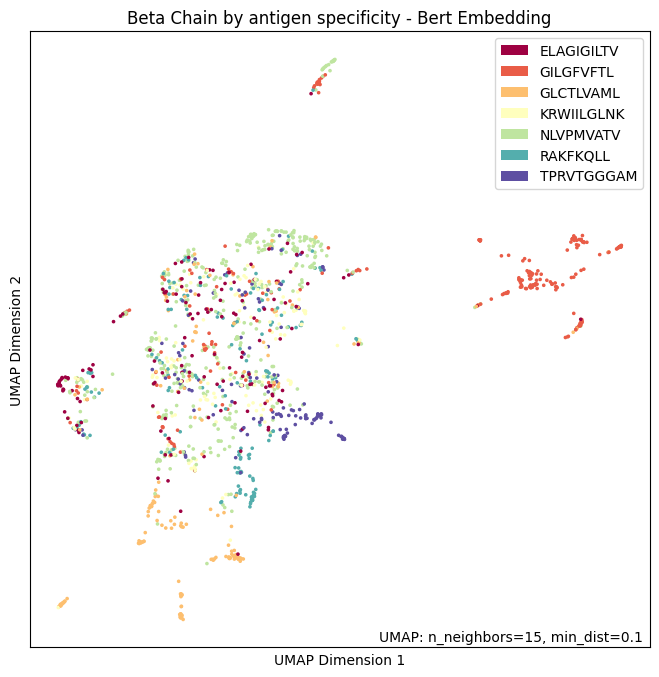

In [51]:
value_counts_antigen = embedding_df['antigen.epitope'].value_counts()
top_10_value_counts = value_counts_antigen.nlargest(7)
embedding_df_filtered = embedding_df[embedding_df['antigen.epitope'].isin(top_10_value_counts.index)]
print(embedding_df_filtered.shape)
distances_reduced = umap.UMAP(n_components = 2).fit(embedding_df_filtered.iloc[:, :-1].values)
distances_reduced
output_dir = 'visualisations'
f = umap.plot.points(distances_reduced, labels=embedding_df_filtered['antigen.epitope'])
f.set_xlabel('UMAP Dimension 1', fontsize=10)
f.set_ylabel('UMAP Dimension 2', fontsize=10)
f.set_title(f'Beta Chain by antigen specificity - Bert Embedding', fontsize=12)
f.get_figure().savefig(f'{output_dir}/beta_chain_umap_bert.png')


